In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet

import scipy
import scipy.stats as stats
import statsmodels.api as sm

# MODELLING -OUTLIERS REMOVED

Modelling data:
- Outliers removed ±1.5xIQR)
- Dummification of all full postcodes
- Feature count: 4270
- Standard Scaling applied
- Sparse Matrix applied

In [3]:
modelling_dataset = "./data/modelling_dataset/final_modelling_df_2021_brom_croy_freehold.csv"

In [4]:
df = pd.read_csv(modelling_dataset) 

In [5]:
#geocode_df = pd.read_csv('./data/bromley_croydon_clean/brom_croy_2021_2022_freehold_geocode_full.csv')

In [6]:
#geocode_dataset[geocode_dataset.result == 0].index

In [7]:
#[59, 807, 1796, 2846, 4055, 4539, 6224]

In [8]:
textual = ['postcode', 'postcode_half1', 'property_type']
numerical = ['bedrooms','bathrooms','lounges']
pred = ['last_sold_price_gbp']



#### Dummification

In [9]:
dum_df = pd.concat([pd.get_dummies(df[textual]), df[numerical]], axis=1)

In [10]:
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7872 entries, 0 to 7871
Columns: 4270 entries, postcode_BR1 1HP to lounges
dtypes: float64(2), int64(1), uint8(4267)
memory usage: 32.2 MB


In [11]:
#sparse_df = scipy.sparse.csr_matrix(dum_df.values)

In [12]:
X = dum_df
y = df[pred]

#Sparse Version
#X = sparse_df


#### Train Test Split

In [13]:
train_test_tuple = X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [14]:
kf = 3 # KFold(n_splits=5, shuffle=True, random_state=10)

#### Standardisation

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train = scipy.sparse.csr_matrix(X_train)
X_test = scipy.sparse.csr_matrix(X_test)

#### Creating a Model Scoring Function

In [17]:
def model_scorer(model, X_tr, X_ts, y_tr, y_ts):
    """Convenience function to print model scores and return """
    train_score = model.score(X_tr, y_tr)
    print('Train score:', train_score)
    
    cv = cross_val_score(model, X_tr, y_tr, cv=kf)
    print('CV scores:', cv)
    print('CV standard deviation:', cv.std() )
    print('Mean CV score:', cv.mean())
    
    test_score = model.score(X_ts, y_ts)
    print('Test score:', model.score(X_ts, y_ts))
     
    return {"train_score":train_score,
            "cv_scores":cv,
            "test_score":test_score}

#### Linear Regression

In [205]:
lin_model_1 = LinearRegression()
lin_model_1.fit(X_train, y_train)


LinearRegression()

In [206]:
model_scorer(lin_model_1, X_train, X_test, y_train, y_test);

Train score: 0.9423637068199074
CV scores: [0.61473853 0.62696672 0.60753207 0.62767061 0.64880268]
CV standard deviation: 0.014056265759160446
Mean CV score: 0.625142122312826
Test score: 0.6347703928120736


#### Decision Tree

In [207]:
dt_model_1 = DecisionTreeRegressor()
dt_model_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [208]:
model_scorer(dt_model_1, *train_test_tuple);

Train score: -1.0788628599350796
CV scores: [0.62663341 0.64977894 0.64500526 0.6512117  0.61592559]
CV standard deviation: 0.01398876256337928
Mean CV score: 0.6377109801491035
Test score: -1.10793826952498


#### Random Forest

In [209]:
rf_model_1 = RandomForestRegressor()
rf_model_1.fit(X_train, y_train.values.flatten())

RandomForestRegressor()

In [210]:
model_scorer(rf_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.9572998622528324
CV scores: [0.69412781 0.69928219 0.70842771 0.71408146 0.68879055]
CV standard deviation: 0.009225262044237218
Mean CV score: 0.7009419421552918
Test score: 0.6726347793671568


### Modellling with Regularisation

#### Ridge

In [212]:
np.logspace(-10,10,11)

array([1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04,
       1.e+06, 1.e+08, 1.e+10])

In [213]:
ridge_cv_1 = RidgeCV(alphas=np.logspace(-10,10,11))
ridge_cv_1.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04,
       1.e+06, 1.e+08, 1.e+10]))

In [214]:
ridge_cv_1.alpha_

100.0

In [215]:
ridge_cv_2 = RidgeCV(alphas=np.logspace(-2,2,11))
ridge_cv_2.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e-02, 2.51188643e-02, 6.30957344e-02, 1.58489319e-01,
       3.98107171e-01, 1.00000000e+00, 2.51188643e+00, 6.30957344e+00,
       1.58489319e+01, 3.98107171e+01, 1.00000000e+02]))

In [216]:
ridge_cv_2.alpha_

100.0

In [217]:
ridge_cv_3 = RidgeCV(alphas=np.linspace(1.58489319e-01,1.00000000e+00, 21))
ridge_cv_3.fit(X_train,y_train)

RidgeCV(alphas=array([0.15848932, 0.20056485, 0.24264039, 0.28471592, 0.32679146,
       0.36886699, 0.41094252, 0.45301806, 0.49509359, 0.53716913,
       0.57924466, 0.62132019, 0.66339573, 0.70547126, 0.7475468 ,
       0.78962233, 0.83169786, 0.8737734 , 0.91584893, 0.95792447,
       1.        ]))

In [218]:
ridge_cv_3.alpha_

1.0

In [219]:
ridge_cv_4 = RidgeCV(alphas=np.linspace(0.36886699,0.41094252, 21))
ridge_cv_4.fit(X_train,y_train)

RidgeCV(alphas=array([0.36886699, 0.37097077, 0.37307454, 0.37517832, 0.3772821 ,
       0.37938587, 0.38148965, 0.38359343, 0.3856972 , 0.38780098,
       0.38990475, 0.39200853, 0.39411231, 0.39621608, 0.39831986,
       0.40042364, 0.40252741, 0.40463119, 0.40673497, 0.40883874,
       0.41094252]))

In [220]:
ridge_cv_4.alpha_

0.41094252

In [221]:
ridge_alpha_1 = ridge_cv_1.alpha_
ridge_model_1 = Ridge(alpha=ridge_alpha_1)
ridge_model_1.fit(X_train, y_train)

Ridge(alpha=100.0)

In [222]:
model_scorer(ridge_model_1, *train_test_tuple);

Train score: -0.41939019413633627
CV scores: [0.6375475  0.61820739 0.64555934 0.61721136 0.61394843]
CV standard deviation: 0.01263244723989865
Mean CV score: 0.6264948073405769
Test score: -0.42667837044912194


In [223]:
ridge_model_1.alpha

100.0

In [224]:
ridge_alpha_2 = ridge_cv_2.alpha_
ridge_model_2 = Ridge(alpha=ridge_alpha_2)
ridge_model_2.fit(X_train, y_train)

Ridge(alpha=100.0)

In [225]:
model_scorer(ridge_model_2, *train_test_tuple);

Train score: -0.41939019413633627
CV scores: [0.6375475  0.61820739 0.64555934 0.61721136 0.61394843]
CV standard deviation: 0.01263244723989865
Mean CV score: 0.6264948073405769
Test score: -0.42667837044912194


In [226]:
ridge_model_2.alpha

100.0

In [227]:
ridge_alpha_3 = ridge_cv_3.alpha_
ridge_model_3 = Ridge(alpha=ridge_alpha_3)
ridge_model_3.fit(X_train, y_train)

Ridge()

In [228]:
model_scorer(ridge_model_3, *train_test_tuple);

Train score: -0.39746643078884225
CV scores: [0.703725   0.69681433 0.70243355 0.69809769 0.70227373]
CV standard deviation: 0.0027017798077247734
Mean CV score: 0.7006688602877826
Test score: -0.4044165474249881


#### Lasso

In [229]:
lasso_cv_1 = LassoCV()
lasso_cv_1.fit(X_train, y_train.values.flatten())


LassoCV()

In [230]:
lasso_alpha = lasso_cv_1.alpha_
lasso_model_1 = Lasso(alpha=lasso_alpha)
lasso_model_1.fit(X_train, y_train.values.flatten())

Lasso(alpha=511.51128214388046)

In [231]:
model_scorer(lasso_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.9026761869189404
CV scores: [0.69004239 0.68400045 0.68279889 0.69003917 0.6931018 ]
CV standard deviation: 0.003934611904430304
Mean CV score: 0.6879965394533448
Test score: 0.6768111174899232


#### ElasticNet

In [ ]:
alpha_range = np.logspace(-10,10,21)
l1_range = [.1, .5, .7, .9, .95, .99, 1]

elasticnet_cv_1 = ElasticNetCV(l1_ratio= l1_range,
                               alphas=alpha_range,
                               cv=3,
                               random_state=1,
                               n_jobs=2,
                               max_iter=100000
                              )
elasticnet_cv_1.fit(X_train,y_train.values.flatten())

/Users/oscarmumford/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148881619474.734, tolerance: 10010507816.458698
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/oscarmumford/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 808242810980.8416, tolerance: 9884589625.306519
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/oscarmumford/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1335074269901.5366, tolerance: 10010507816.458698
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/oscarmumford/opt/anac

In [ ]:
elasticnet_cv_1.l1_ratio_

In [ ]:
elasticnet_cv_1.alpha_

In [ ]:
elasticnet_alpha = elasticnet_cv_1.alpha_
elasticnet_l1 = elasticnet_cv_1.l1_ratio_
elasticnet_model_1 = ElasticNet(alpha=elasticnet_alpha, l1_ratio=elasticnet_l1)
elasticnet_model_1.fit(X_train, y_train.values.flatten())


In [ ]:
model_scorer(elasticnet_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

### BOOSTING

In [237]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor

#### AdaBoost

In [238]:
base_estimator = DecisionTreeRegressor()
ada_model_1 = AdaBoostRegressor(base_estimator=base_estimator,
                          n_estimators=100,
                          random_state=1)
ada_model_1.fit(X_train, y_train.values.flatten())


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                  random_state=1)

In [239]:
model_scorer(ada_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.9878828338117415
CV scores: [0.70276136 0.6983594  0.72386377 0.71791836 0.68557042]
CV standard deviation: 0.013761762916999985
Mean CV score: 0.7056946620397938
Test score: 0.6734319828571487


#### Gradient Boost

In [240]:
gradientBoost_model_1 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=1)

gradientBoost_model_1.fit(X_train, y_train.values.flatten())


GradientBoostingRegressor(random_state=1)

In [241]:
model_scorer(gradientBoost_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.6822770461829888
CV scores: [0.65420296 0.63905268 0.67205696 0.65117084 0.62939753]
CV standard deviation: 0.014466911227869169
Mean CV score: 0.6491761931745057
Test score: 0.6200408634464871


{'train_score': 0.6822770461829888,
 'cv_scores': array([0.65420296, 0.63905268, 0.67205696, 0.65117084, 0.62939753]),
 'test_score': 0.6200408634464871}

#### Neural Net Model

In [133]:
from sklearn.neural_network import MLPRegressor

In [135]:
nnet = MLPRegressor(hidden_layer_sizes=(4,3),
                    solver='adam', activation='relu', alpha=1,
                    max_iter = 10000, random_state=1
                   )
nnet.fit(X_train, y_train.values.flatten())


MLPRegressor(alpha=1, hidden_layer_sizes=(4, 3), max_iter=10000, random_state=1)

In [136]:
nnet.score(X_test, y_test)

0.584965049993089

# SCIPY MODELLING?

In [242]:
sm.add_constant(X_train)

/var/folders/q6/lwrvjh5x78jbrc_15wzqk_hc0000gp/T/ipykernel_93356/823477396.py:1: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  sm.add_constant(X_train)


TypeError: unsupported operand type(s) for &: 'csr_matrix' and 'bool'

Statsmodels do not work with sparse matrices so I will not be implementing this

# COEFFICIENT ANALYSIS

In [318]:
# collect the model coefficients in a dataframe
lin_model_1_coefs = pd.DataFrame(lin_model_1.coef_.flatten(), index=X.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
lin_model_1_coefs['coef_abs'] = lin_model_1_coefs.coefficients.abs()
#lin_model_1_coefs.sort_values('coef_abs', ascending=False).head(20)

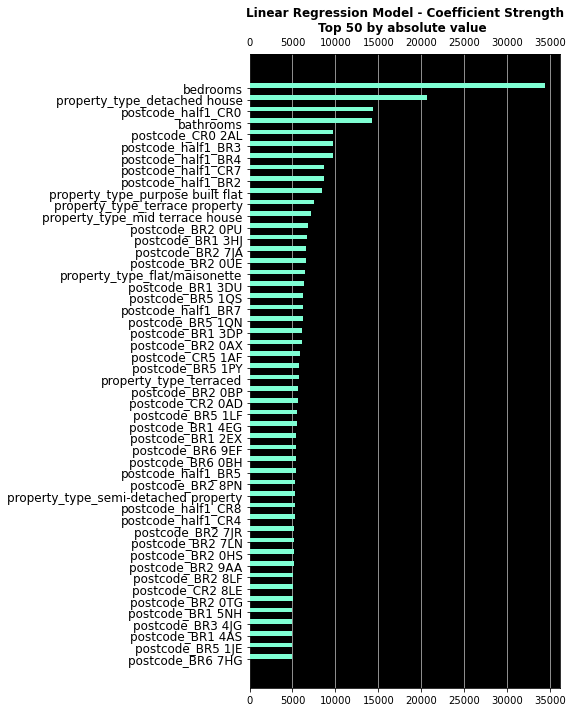

In [317]:
# plot the magnitude of the coefficients
fig, ax = plt.subplots(figsize=(8,10))
n_values_to_display = 50
plt_x = lin_model_1_coefs['coef_abs'].sort_values( ascending=False)[:n_values_to_display][::-1]
plt_y = lin_model_1_coefs[['coef_abs']].sort_values('coef_abs', ascending=False)[:n_values_to_display].index[::-1]

ax.barh(y=plt_y, width=plt_x, height=0.4, color='aquamarine', align='edge', zorder=3)
plt.yticks(fontsize=12) #fontdict={"fontsize":10})
#lin_model_1_coefs['coef_abs'].sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,20), color='purple')
ax.set_title(f"Linear Regression Model - Coefficient Strength\nTop {n_values_to_display} by absolute value ", fontweight='bold')#fontdict={'fontweight':"b"})

ax.set_facecolor('black')
ax.grid(axis='x', zorder=0)
ax.tick_params(labeltop=True)
plt.tight_layout();

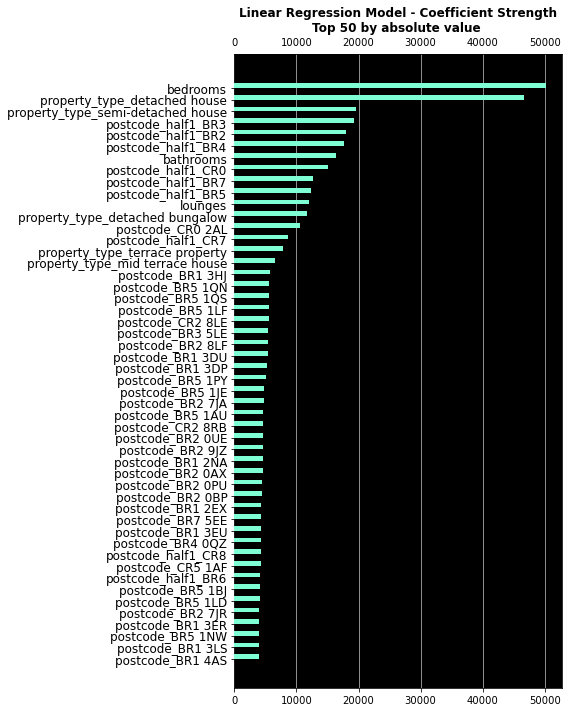

In [319]:
# collect the model coefficients in a dataframe
lasso_model_1_coefs = pd.DataFrame(lasso_model_1.coef_.flatten(), index=X.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
lasso_model_1_coefs['coef_abs'] = lasso_model_1_coefs.coefficients.abs()
#lasso_model_1_coefs.sort_values('coef_abs', ascending=False).head(20)


# plot the magnitude of the coefficients
fig, ax = plt.subplots(figsize=(8,10))
n_values_to_display = 50
plt_x = lasso_model_1_coefs['coef_abs'].sort_values( ascending=False)[:n_values_to_display][::-1]
plt_y = lasso_model_1_coefs[['coef_abs']].sort_values('coef_abs', ascending=False)[:n_values_to_display].index[::-1]

ax.barh(y=plt_y, width=plt_x, height=0.4, color='aquamarine', align='edge', zorder=3)
plt.yticks(fontsize=12) #fontdict={"fontsize":10})
#lasso_model_1_coefs['coef_abs'].sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,20), color='purple')
ax.set_title(f"Linear Regression Model - Coefficient Strength\nTop {n_values_to_display} by absolute value ", fontweight='bold')#fontdict={'fontweight':"b"})

ax.set_facecolor('black')
ax.grid(axis='x', zorder=0)
ax.tick_params(labeltop=True)
plt.tight_layout();

In [ ]:
residuals = y_test.values.flatten() - lin_model_1.predict(X_test).flatten()
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(residuals, bins=100)
ax.set_title("Plotting residuals from linear regression");



In [ ]:
statsmodels.graphics.gofplots.qqplot¶

### Visually testing predictions


In [175]:
y_test.iloc[25]

last_sold_price_gbp    532500.0
Name: 70352, dtype: float64

In [176]:
lin_model_1.predict(X_test[25])

array([[573118.31715066]])

In [177]:
rf_model_1.predict(X_test[25])

array([548880.])

In [178]:
dt_model_1.predict(X_test[25])

array([575000.])

# CONCLUSIONS


The best score achieved was using a ________ model. This means we can predict the true value of properties in the given areas of London with an accuracy of __% using our best model. 

The coefficients which had the largest affect on our score were:
-
-
-
-



# NEXT STEPS


Our model should be improved in a number of ways. 

Next goals of the model are to scrape all available properties in London (circa 3.5 Million). 